### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#Loading the data
data = load_breast_cancer()
X,y= data.data, data.target
#split into traioning and test
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state = 42)

In [3]:
# Scaling the dataset using minmaxscaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Applying KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [5]:
score = knn.score(X_test_scaled, y_test)
score


0.9649122807017544

2) Repeat Step 1 using pipelines and report the score.

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
pipeline = Pipeline([('scaler', MinMaxScaler()), # step 1 scaling
                     ('knn', KNeighborsClassifier(n_neighbors = 5))]) #step2 KNN classifier

In [8]:
#train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [9]:
#evaluate the model
score = pipeline.score(X_test, y_test)
score


0.9649122807017544

3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
#define parameter grid for gridserachCV
param_grid= {'knn__n_neighbors': [3,5,7,9,11]} # testing different k values

In [12]:
grid_search = GridSearchCV(pipeline, param_grid, cv= 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             scoring='accuracy')

In [15]:
# Print the best parameters and corresponding accuracy
print(f'Best n_neighbors: {grid_search.best_params_["knn__n_neighbors"]}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

Best n_neighbors: 3
Best cross-validation accuracy: 0.9626


In [16]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

In [17]:
print(f'Best model test accuracy: {test_score:.4f}')

Best model test accuracy: 0.9649


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y.
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('bike_day_raw.csv')

In [20]:
df.shape

(731, 11)

In [21]:
df.dtypes

,0
season,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
atemp,float64
hum,float64
windspeed,float64


In [22]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [24]:
X = df.drop(columns=['cnt'])
y = df['cnt']

In [25]:
import matplotlib.pyplot as plt

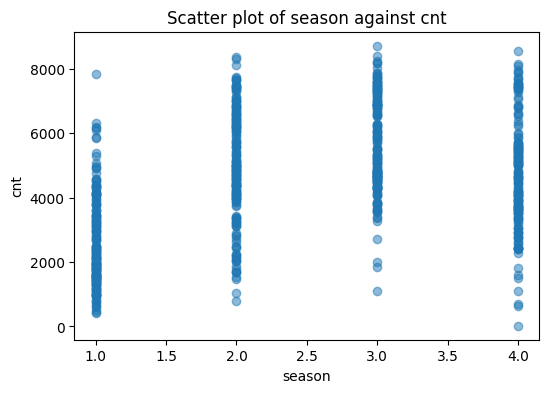

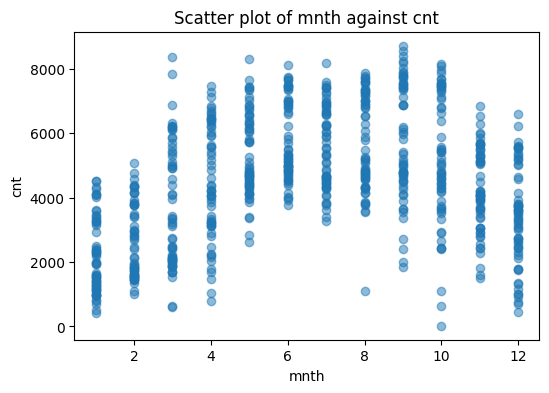

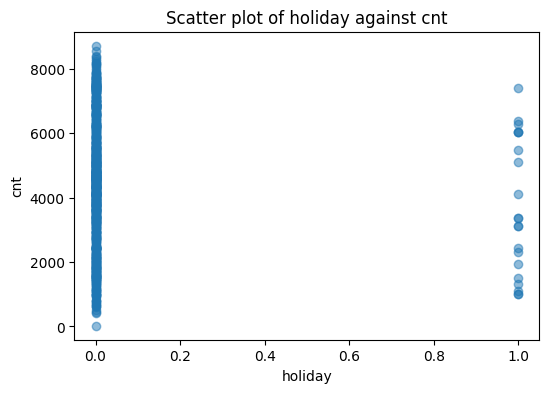

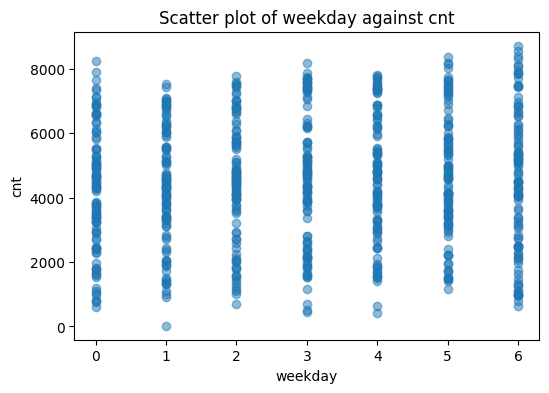

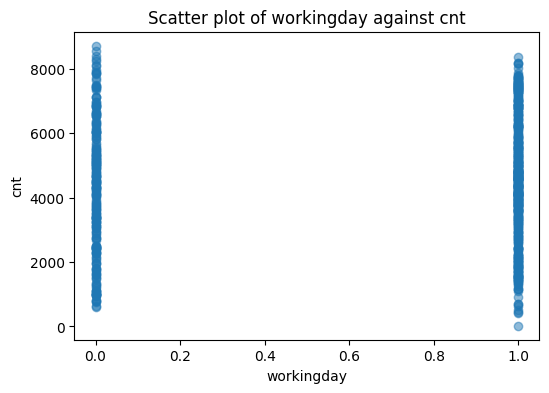

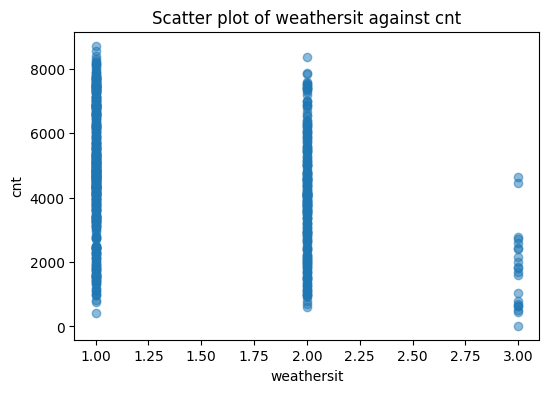

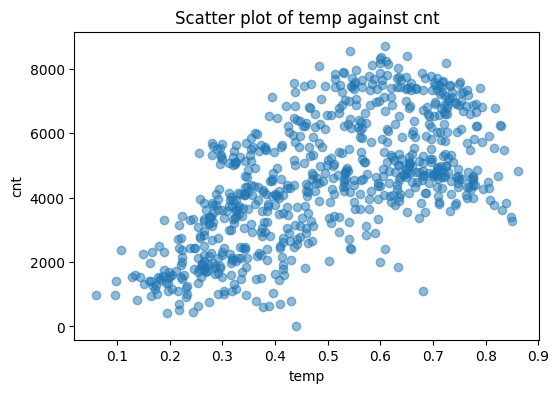

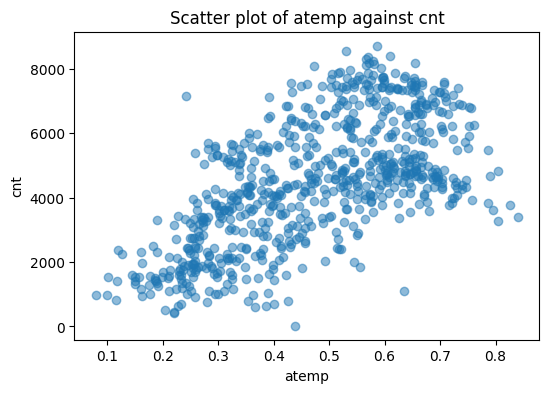

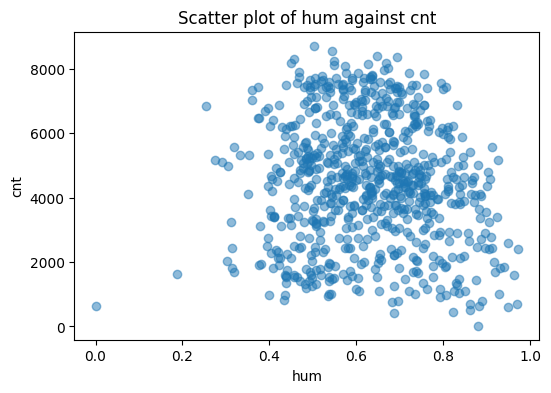

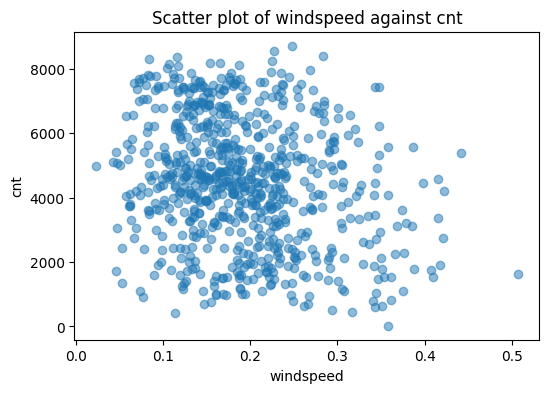

In [27]:
# Create scatter plots of each feature against the target variable
for col in X.columns:
  plt.figure(figsize=(6,4))
  plt.scatter(X[col],y, alpha=0.5)
  plt.xlabel(col)
  plt.ylabel('cnt')
  plt.title(f'Scatter plot of {col} against cnt')
  plt.show()


In [28]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features


Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [29]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index([], dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [35]:
# Create a pipeline for numeric features (Imputation + Scaling)
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # filling missing values
    ('scaler', StandardScaler()) # standard scaling
])

In [36]:
# Create a transformer for categorical features (OneHotEncoding)
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

In [42]:
# ColumnTransformer combining both numeric and categorical transformations
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [49]:
# Create final pipeline with preprocessor and KNeighborsRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor()) # here default n_neighbors=5
])


In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit', 'temp',
                                                   'atemp', 'hum',
                                                   'windspeed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('knn', KNeighborsRegressor())])

In [52]:
# Report the score on the test dataset
test_score = pipeline.score(X_test, y_test)
print(f"\nKNeighborsRegressor Test Score: {test_score:.4f}")


KNeighborsRegressor Test Score: 0.5779
